In [2]:
import cv2

In [3]:
from PIL import Image

In [6]:
img = Image.open('page_3.png')

In [12]:
import matplotlib.pyplot as plt

In [16]:
#Information_Coordinates(x1,y1,x2,y2)
#---------------------------------------------------------------
bounding_box = (50, 100, 1185, 1595) # w.r.t. page
voter_box = (0, 0, 375, 150) # w.r.t. bounding_box
# w.r.t voter_box
id_box = (250,0,375,25)  
info_box = (0,25,250,120)
age_box = (0,95,100,125)
home_box = (0, 70, 150, 95)
name_box = (0,25,250,50)
guardian_box = (0,45,250,73)
gender_box = (95, 90, 250, 125)

In [1]:
import cv2
import numpy as np

In [22]:
image = cv2.imread('page_3.png')

In [23]:
# Example preprocessing (you may need to adapt this based on your document)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [26]:
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [27]:
rectangles = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # Adjust the following conditions as needed to filter out unwanted rectangles
    if w > 10 and h > 10:
        rectangle = image[y:y+h, x:x+w]
        rectangles.append(rectangle)

In [28]:
len(rectangles)

1

In [34]:
img = Image.open('page_27.png')

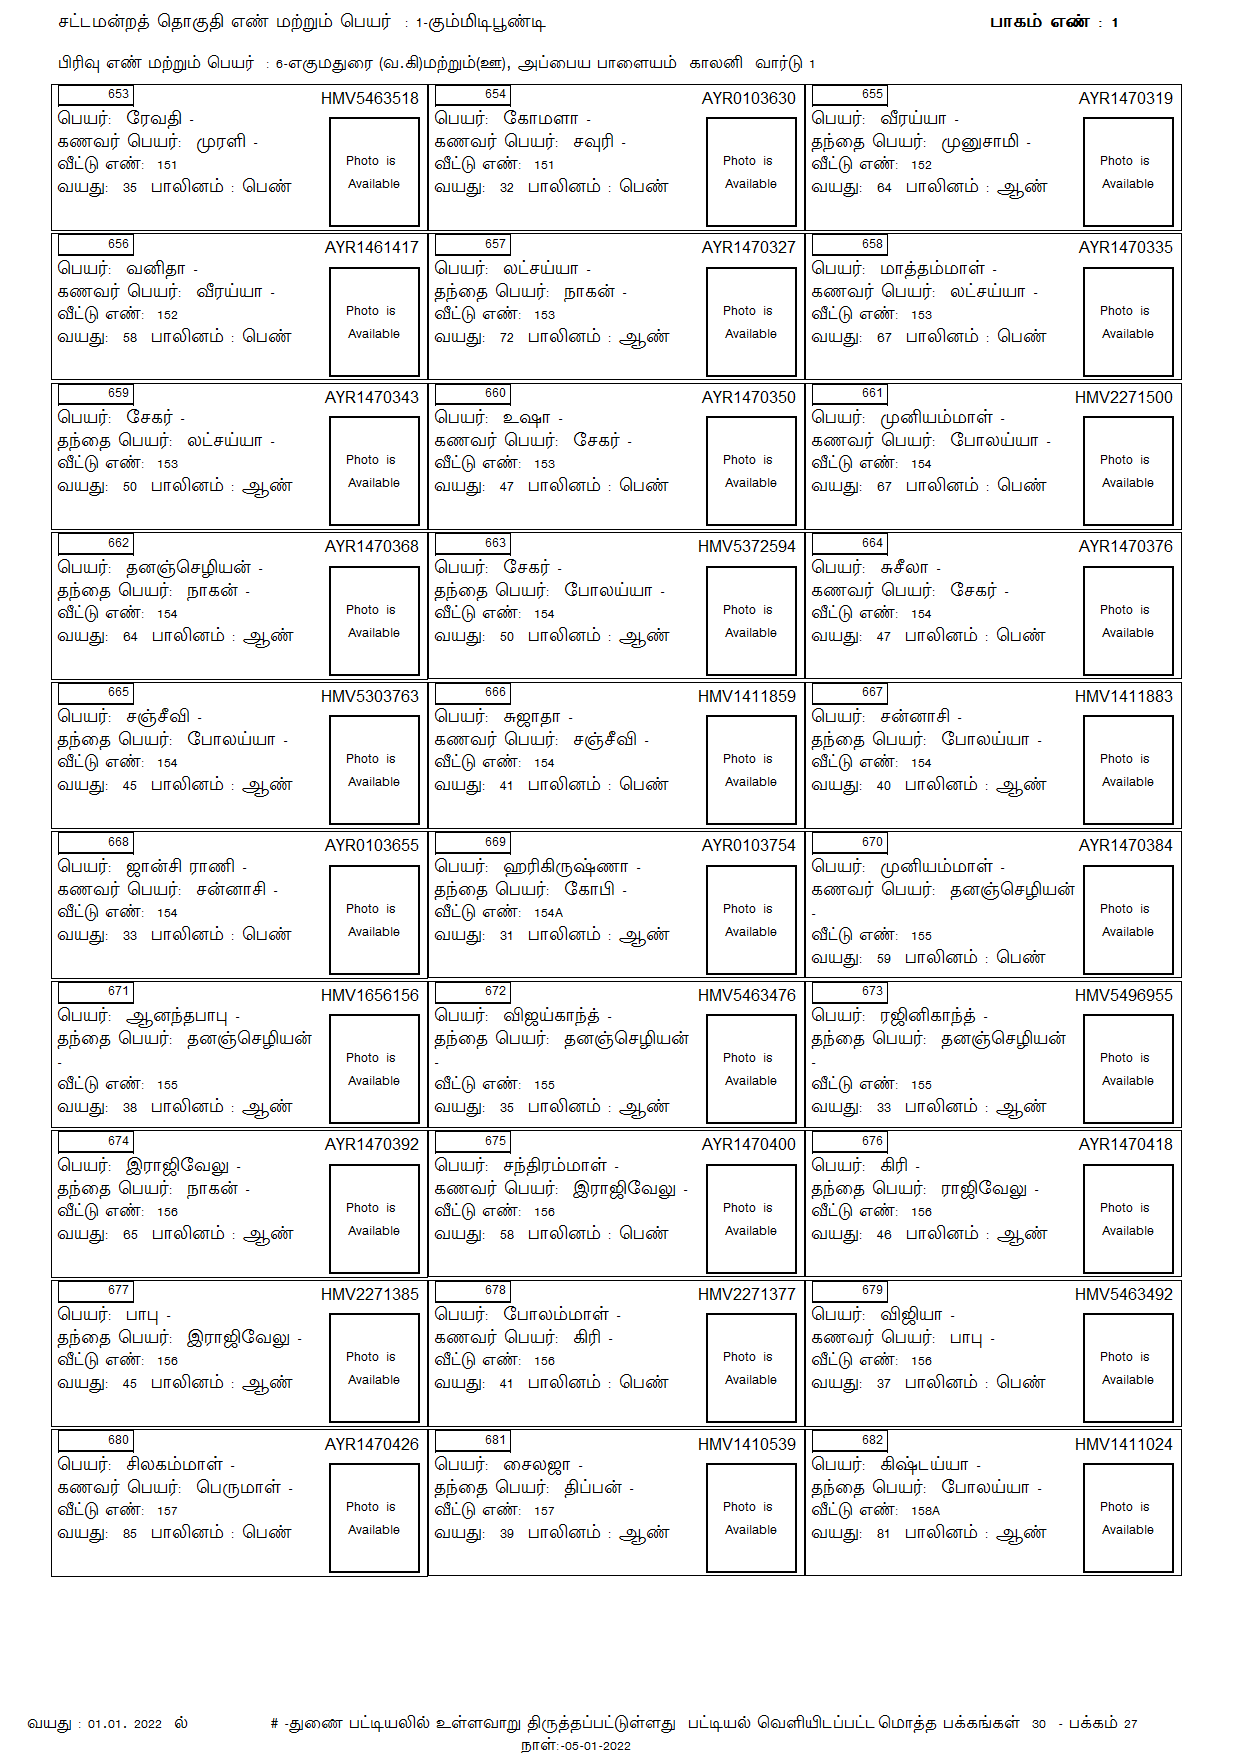

In [35]:
img

In [36]:
img_interest = img.crop(bounding_box)

In [38]:
image = cv2.imread('page_28.png')

In [4]:
import pytesseract as pts
pts.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [11]:
# Step 1: Read the Image
image = cv2.imread('page_11.png')

# Step 2: Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Text Detection
text = pytesseract.image_to_string(gray)

# Step 4: Threshold the Text
_, binary_mask = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Step 5: Find Rectangular Boxes
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 6: Create a Mask for Large Rectangular Boxes
mask = np.zeros_like(image)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Define a threshold for the minimum area (adjust as needed)
    min_area_threshold = 1000
    
    # Check if the contour has an area greater than the threshold
    if cv2.contourArea(contour) > min_area_threshold:
        cv2.rectangle(mask, (x, y), (x + w, y + h), (255, 255, 255), thickness=cv2.FILLED)

# Step 7: Apply the Mask
result = cv2.bitwise_and(image, mask)

# Step 8: Display or Save the Result
cv2.imshow('Result with Large Rectangles', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# To save the result
cv2.imwrite('pag_11_large_rectangles_only.png', result)


True